# Encoding
Encoding is required for some classifiers as they cannot handle categorical values and therefore must be converted into a numerical format.


#### Ordinal Encoder
+ OrdEnc used to encode labels (the categories variable).
+ fit_transform used to fit the encoder to the categories and encode them all in one step.
+ For loop used to show which encoded value represents each categorical Value 


In [1]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

categories = asarray([["Flower", "Vegetable"],["House", "Vegetable"],["Grass", "Fruit"]])
ordEnc = OrdinalEncoder()

transformed = ordEnc.fit_transform(categories)

for x in range(len(transformed)):
    print(str(categories[x]) + " values are respectively assigned " + str(transformed[x]))   

['Flower' 'Vegetable'] values are respectively assigned [0. 1.]
['House' 'Vegetable'] values are respectively assigned [2. 1.]
['Grass' 'Fruit'] values are respectively assigned [1. 0.]


# 
#### Label Encoder
+ LabelEncoder imported in order to encode labels.
+ fit_transform used to fit the encoder to the categories and encode them all in one step.
+ For loop used to show which encoded value represents each label

In [2]:
from sklearn.preprocessing import LabelEncoder

categories = asarray(["Flower", "House", "Grass"])
lblEnc = LabelEncoder()

transformed = lblEnc.fit_transform(categories)

for x in range(len(transformed)):
    print(str(categories[x]) + " label is assigned " + str(transformed[x])) 

Flower label is assigned 0
House label is assigned 2
Grass label is assigned 1


# 
#### One Hot Encoder
+ OneHotEncoder imported in order to encode labels.
+ fit_transform used to fit the encoder to the categories and encode them all in one step.
+ For loop used to show which encoded binary variable represents each label


In [3]:
from sklearn.preprocessing import OneHotEncoder

categories = asarray([["Flower"], ["House"], ["Grass"]])

ohe = OneHotEncoder(sparse=False)
transformed = ohe.fit_transform(categories)

for x in range(len(transformed)):
    print(str(categories[x]) + " label is assigned " + str(transformed[x])) 

['Flower'] label is assigned [1. 0. 0.]
['House'] label is assigned [0. 0. 1.]
['Grass'] label is assigned [0. 1. 0.]


#### The first bit of the one hot encoder is dropped in the following cell:

In [4]:
ohe = OneHotEncoder(sparse=False, drop='first')
transformed = ohe.fit_transform(categories)

for x in range(len(transformed)):
    print(str(categories[x]) + " label is assigned " + str(transformed[x])) 

['Flower'] label is assigned [0. 0.]
['House'] label is assigned [0. 1.]
['Grass'] label is assigned [1. 0.]


# 
# 
# OVR meta-strategy

In [6]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# make a multi class (3 classes) classification problem with 10 observations and 5 features (3 informative and 2 redundant)
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_redundant=2, n_classes=3, random_state=123)

# splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# define model
model = LogisticRegression()

# define the ovr strategy
ovr = OneVsRestClassifier(model)

# fit model
ovr.fit(X_train, y_train)

# make predictions
yhat = ovr.predict(X_test)

print("The predicted labels", yhat)
print("\nThe actual labels",y_test)

print("\nThe accuracy is:", ovr.score(X_test, y_test))

The predicted labels [2 1 0 2 1 0 2 0 2 2 1 0 2 0 0 0 2 1 2 1 0 1 0 1 0 2 1 1 2 1 1 2 2 0 2 0 2
 2 1 1 1 2 2 0 1 0 1 0 1 0 1 0 2 1 0 1 0 1 2 1 1 2 2 1 0 1 0 2 1 0 1 0 1 1
 2 0 1 2 1 1 2 2 0 2 1 1 2 1 2 2 2 2 0 2 0 2 2 1 0 2]

The actual labels [2 1 0 2 1 2 2 0 2 2 0 0 1 0 0 0 2 1 2 1 0 1 2 1 2 2 0 0 2 1 1 2 2 2 2 0 2
 1 1 0 2 2 2 0 1 0 1 1 1 2 1 2 2 2 1 1 0 0 1 0 1 2 2 0 2 1 1 2 1 0 1 0 1 1
 2 0 1 2 2 1 2 2 0 1 0 1 2 1 2 1 2 2 1 2 0 2 2 1 0 2]

The accuracy is: 0.73


In [7]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.linear_model import LogisticRegression

# define dataset
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_redundant=2, n_classes=3, random_state=123)

# splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# define model
model = LogisticRegression(multi_class='ovr')

# fit model
model.fit(X_train, y_train)

# make predictions
yhat = model.predict(X_test)

print("The predicted labels", yhat)
print("\nThe actual labels",y_test)

print("\nThe accuracy is:", model.score(X_test, y_test))

The predicted labels [2 1 0 2 1 0 2 0 2 2 1 0 2 0 0 0 2 1 2 1 0 1 0 1 0 2 1 1 2 1 1 2 2 0 2 0 2
 2 1 1 1 2 2 0 1 0 1 0 1 0 1 0 2 1 0 1 0 1 2 1 1 2 2 1 0 1 0 2 1 0 1 0 1 1
 2 0 1 2 1 1 2 2 0 2 1 1 2 1 2 2 2 2 0 2 0 2 2 1 0 2]

The actual labels [2 1 0 2 1 2 2 0 2 2 0 0 1 0 0 0 2 1 2 1 0 1 2 1 2 2 0 0 2 1 1 2 2 2 2 0 2
 1 1 0 2 2 2 0 1 0 1 1 1 2 1 2 2 2 1 1 0 0 1 0 1 2 2 0 2 1 1 2 1 0 1 0 1 1
 2 0 1 2 2 1 2 2 0 1 0 1 2 1 2 1 2 2 1 2 0 2 2 1 0 2]

The accuracy is: 0.73


# 
# 
# Confusion Matrix

<AxesSubplot:>

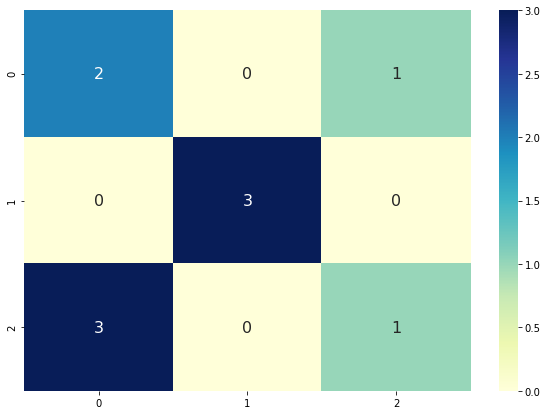

In [8]:
# 1 = 'Flower'
# 2 = 'House'
# 3 = 'Grass'

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# The expected outcomes and the predicted value respectively 
expect  = [2,3,1,1,2,3,1,2,3,3]
predict = [2,1,1,3,2,1,1,2,1,3]

# The initialisation of the confusion matrix
C_matrix = confusion_matrix(expect, predict)

# Converting it into a dataframe so it can be represented using seaborn
df_cm = pd.DataFrame(C_matrix)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", annot_kws={"size": 16})


<AxesSubplot:>

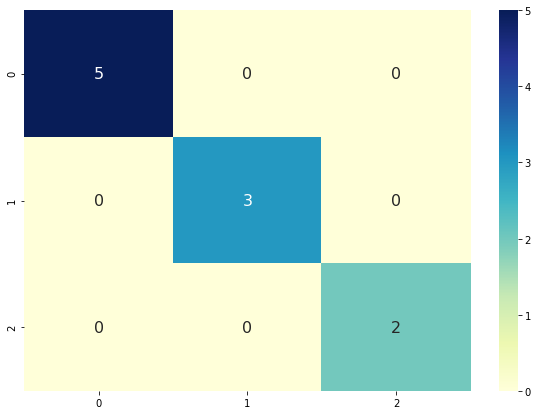

In [9]:
# The expected outcomes and the predicted value respectively 
expect  = [2,1,1,3,2,1,1,2,1,3]
predict = [2,1,1,3,2,1,1,2,1,3]

# The initialisation of the confusion matrix
C_matrix = confusion_matrix(expect, predict)

# Converting it into a dataframe so it can be represented using seaborn
df_cm = pd.DataFrame(C_matrix)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", annot_kws={"size": 16})
